In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline

### Feature Selection

In [2]:
# add some noise
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data),70))

X_w_noise = np.hstack([cancer.data, noise])

print(cancer.data.shape, noise.shape, X_w_noise.shape)

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 20)

(569, 30) (569, 70) (569, 100)


In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
print('raw test score: ', lr.score(X_test, y_test))

raw test score:  0.9300699300699301


#### Univariate Statistics (ANOVA SelectKBest, SelectPercentile, f_classif, f_regression)

We computer whether there is a statistically significant relationship between each feature and the target, then the features that are related with the highest confidence are selected. They only consider each feature individually.

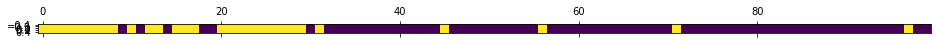

In [4]:
from sklearn.feature_selection import SelectPercentile, SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)

select = SelectPercentile(percentile=30)
select.fit(X_train, y_train)

plt.matshow(select.get_support().reshape(1,-1))

In [5]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr.fit(X_train_selected, y_train)
print('with selection: ',lr.score(X_test_selected, y_test))

with selection:  0.9473684210526315


#### Model_based Feature Selection

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones.

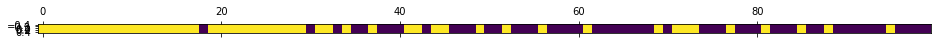

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel( RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = 'median')
select.fit(X_train, y_train)

plt.matshow(select.get_support().reshape(1,-1))

In [7]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr.fit(X_train_selected, y_train)
print('with selection: ',lr.score(X_test_selected, y_test))

with selection:  0.9438596491228071


#### Iterative Feature Selection

In iterative feature selection, a series of models are built, with varying numbers of features. There are two basic methonds: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached

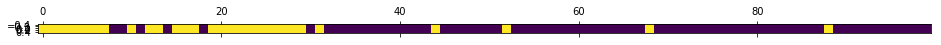

In [11]:
# recursive feature elimination
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 30)
select.fit(X_train, y_train)

plt.matshow(select.get_support().reshape(1,-1))

In [15]:
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

lr.fit(X_train_selected, y_train)
print('with selection: ',lr.score(X_test_selected, y_test))

with selection:  0.9473684210526315
